In [2]:
library(readr)
library(repr)
library(tidyverse)
library(tidymodels)
options(repr.matrix.max.rows = 10)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ purrr     1.0.2
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::fil

### Data Description

This project uses data collected from a research Minecraft server operated by UBC Computer Science. The data consist of two tables: `players.csv` and `sessions.csv`.

- `players.csv`: one row per unique player  
- `sessions.csv`: one row per play session

#### Players Dataset

The `players.csv` dataset includes **196 players** and **7 variables**:

| Variable | Description |Type of data
|---|---|---|
`experience` | Self-reported Minecraft skill level (Beginner/Amateur/Regular/Veteran/Pro)| chr
`subscribe` | Whether the player subscribed to the research newsletter (TRUE/FALSE)  | lgl
`hashedEmail` | Anonymous player identifier  | chr
`played_hours` | Total hours played on the server  | chr
`name` | Player name (not used for modeling)  | chr
`gender` | Player gender  |chr
`Age` | Player-reported age  | dbl

#### Sessions Dataset

The `sessions.csv` dataset contains **1535 sessions** and **5 variables**. Each row represents one play session.

| Variable | Description |Type of data
|---|---|---|
`hashedEmail` | Anonymous player ID  | chr
`start_time` | Session start time  |chr
`end_time` | Session end time  | chr
`original_start_time` | Start time (Unix timestamp)  | dbl
`original_end_time` | End time (Unix timestamp)  |dbl

The `hashedEmail` column links the two datasets. In this planning stage, analysis focuses on the player-level data from `players.csv`, while session-level timing data will be considered in the final project.

In [3]:
player <- read_csv("data/players.csv")
session <- read_csv("data/sessions.csv")
player
session

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,TRUE,b6e9e593b9ec51c5e335457341c324c34a2239531e1890b93ca52ac1dc76b08f,0.0,Bailey,Female,17
Veteran,FALSE,71453e425f07d10da4fa2b349c83e73ccdf0fb3312f778b35c5802c3292c87bd,0.3,Pascal,Male,22
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,57


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
⋮,⋮,⋮,⋮,⋮
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,10/05/2024 23:01,10/05/2024 23:07,1.71538e+12,1.71538e+12
7a4686586d290c67179275c7c3dfb4ea02f4d317d9ee0e2cee98baa27877a875,01/07/2024 04:08,01/07/2024 04:19,1.71981e+12,1.71981e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024 15:36,28/07/2024 15:57,1.72218e+12,1.72218e+12


Question:Can a player’s total play time, experience level, and age predict whether they subscribe to the research newsletter?
How the data helps
The players.csv dataset contains a binary subscribe variable indicating whether each player signed up for the research newsletter. Features such as played_hours, experience, and Age are available to use as predictors. This allows the formulation of a binary classification problem at the player level.

In [4]:
player_means <- player |>
 summarise(across(where(is.numeric), ~ round(mean(.x, na.rm = TRUE), 2)))

player_means

played_hours,Age
<dbl>,<dbl>
5.85,21.14


In the players.csv dataset, the average total play time is approximately 5.85 hours, and the average age of players is around 21.14 years.
This suggests that most players are relatively new to the server, and participation is concentrated among younger users.
The distribution of play time is likely right-skewed, with many users playing a small amount and a few playing much more.

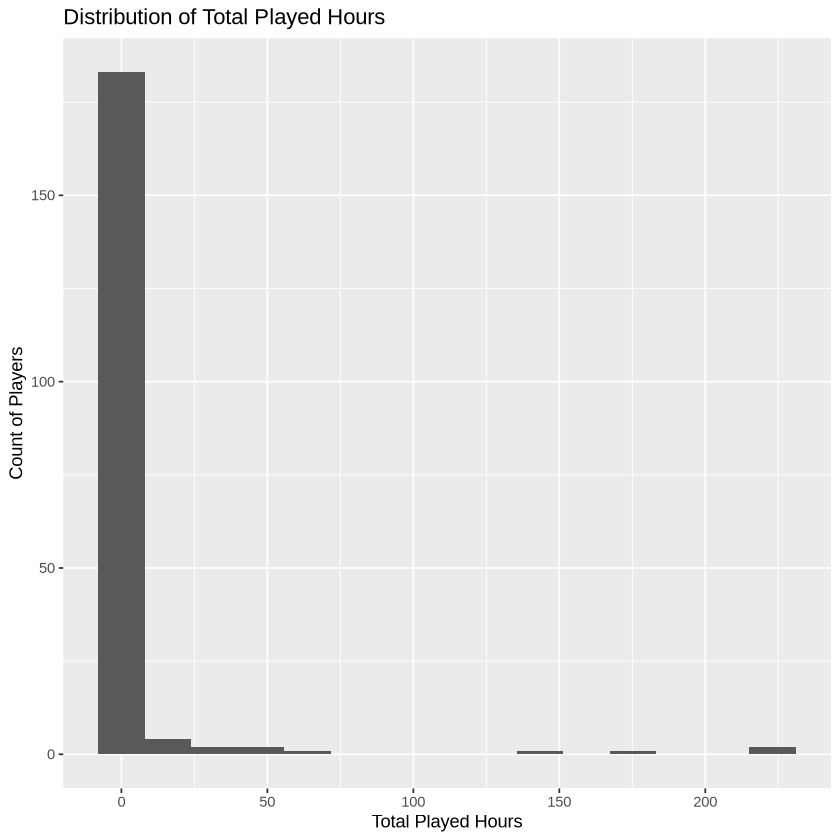

In [5]:
library(ggplot2)

ggplot(player, aes(x = played_hours)) +
  geom_histogram(bins = 15) +
  labs(
    title = "Distribution of Total Played Hours",
    x = "Total Played Hours",
    y = "Count of Players"
  )

Most players spent very little time on the server, while a small number of players accumulated many hours. This distribution is heavily right-skewed, suggesting that player engagement varies widely, with a long tail of highly active players. This will be important for later modeling, as the feature played_hours may require normalization or transformation.

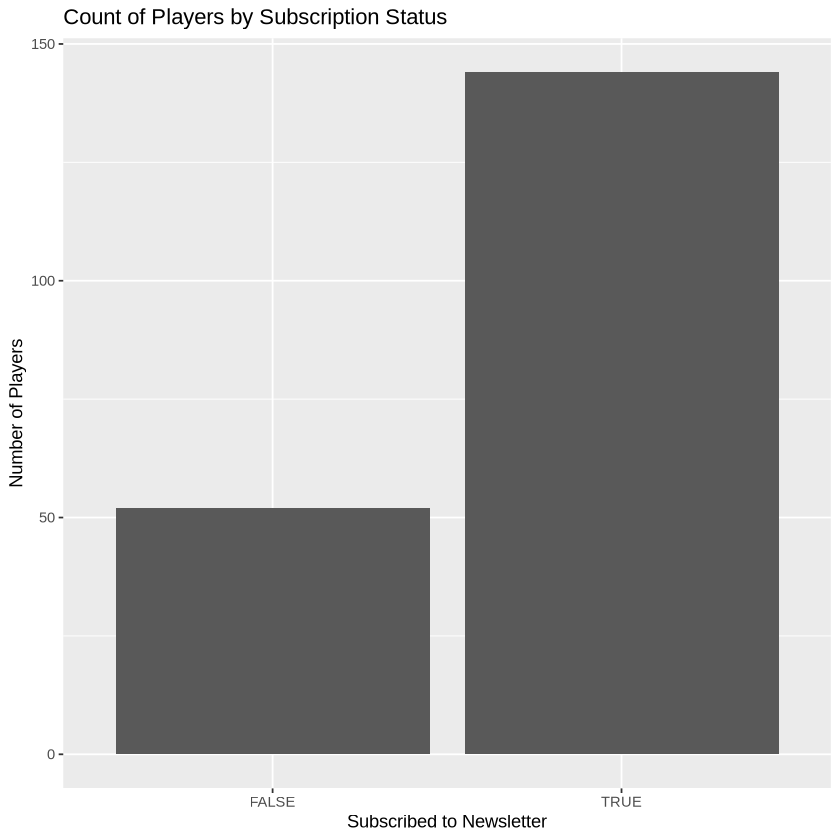

In [6]:
ggplot(player, aes(x = subscribe)) +
  geom_bar() +
  labs(
    title = "Count of Players by Subscription Status",
    x = "Subscribed to Newsletter",
    y = "Number of Players" )

Most players did not subscribe to the newsletter. This indicates that subscription is relatively rare in the dataset, which may result in class imbalance during modeling.

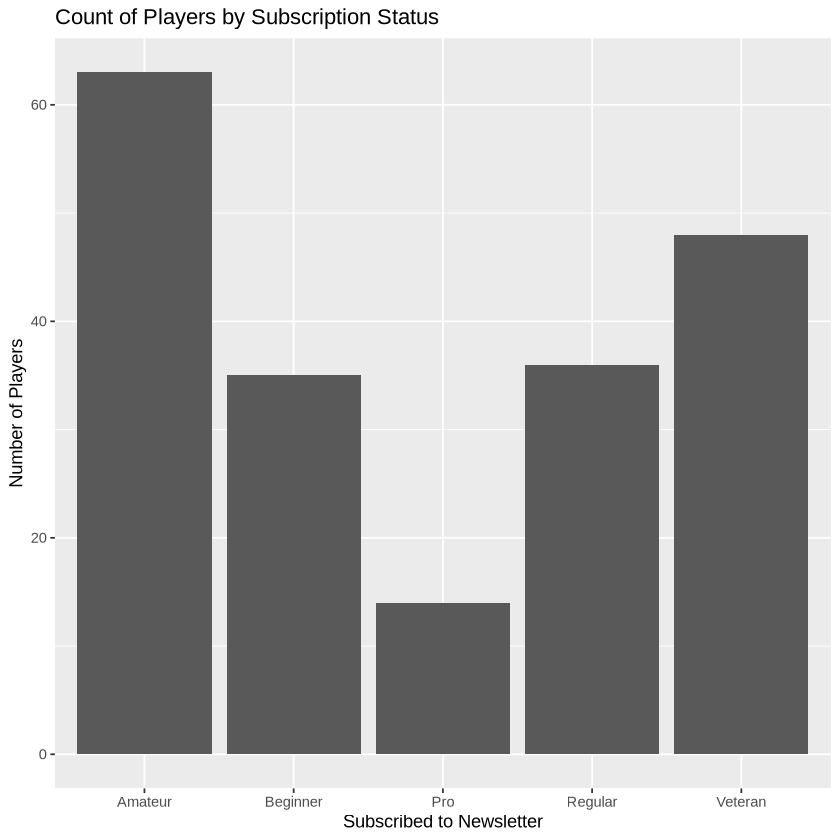

In [7]:
ggplot(player, aes(x = experience)) +
  geom_bar() +
  labs(
    title = "Count of Players by Subscription Status",
    x = "Subscribed to Newsletter",
    y = "Number of Players" )

The plot shows the distribution of players across different self-reported experience levels.
Amateur players make up the largest proportion of the sample, followed by Veteran and Beginner players.
There are fewer Pro players compared to other groups.
This indicates that the player base consists mostly of casual or moderately experienced players, rather than expert players.


### Methods and Plan

For this project, I will build a predictive model to determine whether a player will subscribe to the research newsletter based on their gameplay behaviour and demographics.

Since the outcome variable `subscribe` is binary (TRUE/FALSE), I plan to use **logistic regression** as the primary modeling method. Logistic regression is appropriate for binary classification problems and is easy to interpret, as it shows how each predictor affects the probability of subscribing.

I will use `played_hours`, `experience`, and `Age` as predictors. Before modeling, I will check for skewed variables and consider transformations if necessary (e.g., log‐transforming heavily skewed play‐time values). I will also check for missing values and handle them appropriately.

The data will be split into **training and testing sets (e.g., 80/20)** to evaluate the model’s performance. Model accuracy and confusion matrix will be used as evaluation metrics.

No modeling is performed in this planning stage; this is a plan for the final project.